/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


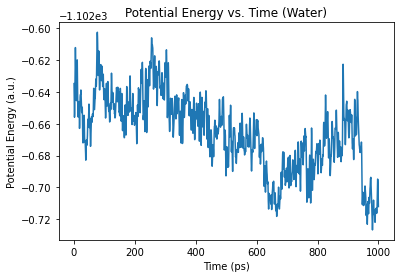

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.transformations as transformations

# potential energy vs time analysis 
# read in .ener file starting from line 2 (water)
data_water = np.genfromtxt('/home/ac7407/comp-class/comp-lab-class/Week12/Runs/Water/water_aimd_1ns_every0.5fs-1.ener', skip_header=2)

# plot potential energy (column 4) vs time (column 1)
plt.plot(data_water[:,1], data_water[:,4])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time (Water)')
plt.show()

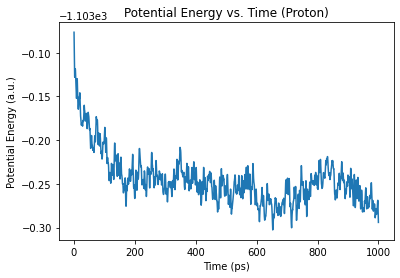

In [2]:
# read in .ener file starting from line 2 (proton)
data_proton = np.genfromtxt('/home/ac7407/comp-class/comp-lab-class/Week12/Runs/Proton/proton_aimd_1ns_every0.5fs-1.ener', skip_header=2)

# plot potential energy (column 4) vs time (column 1)
plt.plot(data_proton[:,1], data_proton[:,4])
plt.xlabel('Time (ps)')
plt.ylabel('Potential Energy (a.u.)')
plt.title('Potential Energy vs. Time (Proton)')
plt.show()



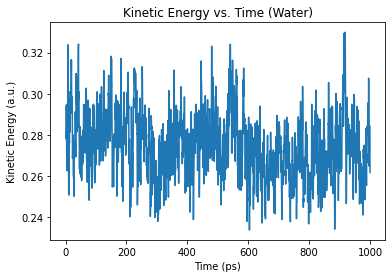

In [3]:
# kinetic energy vs time analysis
# read in .ener file starting from line 2 (water)
data_water = np.genfromtxt('/home/ac7407/comp-class/comp-lab-class/Week12/Runs/Water/water_aimd_1ns_every0.5fs-1.ener', skip_header=2)

# plot kinetic energy (column 2) vs time (column 1)
plt.plot(data_water[:,1], data_water[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs. Time (Water)')
plt.show()


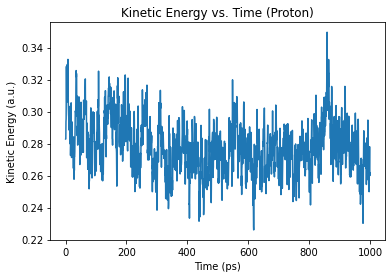

In [4]:
# read in .ener file starting from line 2 (proton)
data_proton = np.genfromtxt('/home/ac7407/comp-class/comp-lab-class/Week12/Runs/Proton/proton_aimd_1ns_every0.5fs-1.ener', skip_header=2)

# plot kinetic energy (column 2) vs time (column 1)
plt.plot(data_proton[:,1], data_proton[:,2])
plt.xlabel('Time (ps)')
plt.ylabel('Kinetic Energy (a.u.)')
plt.title('Kinetic Energy vs. Time (Proton)')
plt.show()


/home/ac7407/.local/lib/python3.8/site-packages/MDAnalysis/analysis/base.py:438: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time
/home/ac7407/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/home/ac7407/.local/lib/python3.8/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


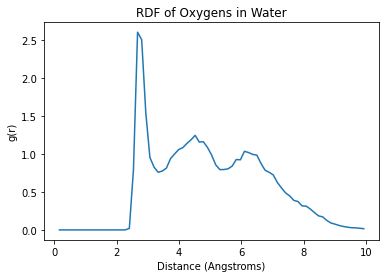

In [5]:
# set box dimensions to be 12.42 angstroms each side
box = transformations.boxdimensions.set_dimensions([12.42, 12.42, 12.42, 90, 90, 90])

# use MDAnalysis to load in trajectory as .xyz format
u = mda.Universe('/home/ac7407/comp-class/comp-lab-class/Week12/Runs/Water/water.xyz', '/home/ac7407/comp-class/comp-lab-class/Week12/Runs/Water/water_aimd_1ns_every0.5fs-pos-1.xyz', transformations = box)

# compute RDFs for oxygens in water using rdf.InterRDF
RDF = rdf.InterRDF(u.select_atoms('name O'), u.select_atoms('name O'), range = (0.1, 10))
RDF.run()

# plot RDF vs. distance
plt.plot(RDF.bins, RDF.rdf)
plt.xlabel('Distance (Angstroms)')
plt.ylabel('g(r)')
plt.title('RDF of Oxygens in Water')
plt.show()

